# Importing library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

# Importing Data Set

In [2]:
df = pd.read_csv("/content/50_Startups.csv")

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


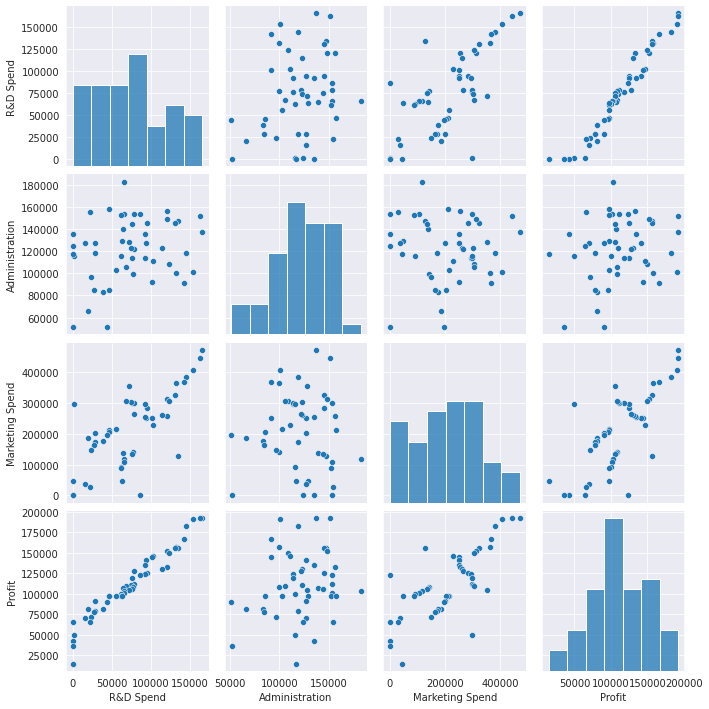

In [7]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [8]:
data=df.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)
data

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


#Model Building

In [9]:
model=smf.ols("Profit~RDS+ADMS+MKTS",data=data).fit()

#Model Testing

In [10]:
model.params

Intercept    50122.192990
RDS              0.805715
ADMS            -0.026816
MKTS             0.027228
dtype: float64

In [11]:
model.tvalues , np.round(model.pvalues,5)

(Intercept     7.626218
 RDS          17.846374
 ADMS         -0.525507
 MKTS          1.655077
 dtype: float64, Intercept    0.00000
 RDS          0.00000
 ADMS         0.60176
 MKTS         0.10472
 dtype: float64)

In [12]:
model.rsquared , model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [13]:
mlr_am=smf.ols("Profit~ADMS+MKTS",data=data).fit()
mlr_am.tvalues , mlr_am.pvalues

(Intercept    1.142741
 ADMS         2.467779
 MKTS         8.281039
 dtype: float64, Intercept    2.589341e-01
 ADMS         1.729198e-02
 MKTS         9.727245e-11
 dtype: float64)

#Graphs

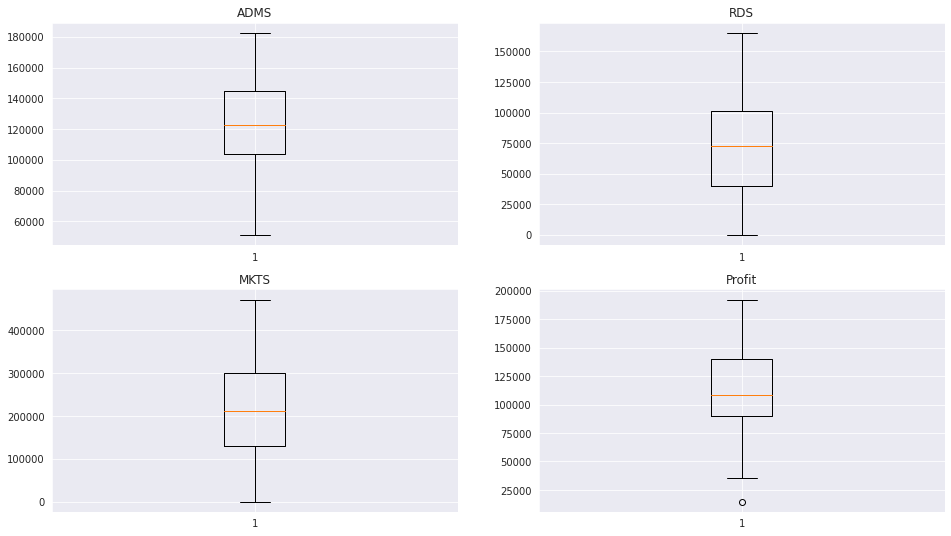

In [14]:
plt.subplots(figsize = (16,9))
plt.subplot(221)
plt.boxplot(data['ADMS'])
plt.title('ADMS')
plt.subplot(222)
plt.boxplot(data['RDS'])
plt.title('RDS')
plt.subplot(223)
plt.boxplot(data['MKTS'])
plt.title('MKTS')
plt.subplot(224)
plt.boxplot(data['Profit'])
plt.title('Profit')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

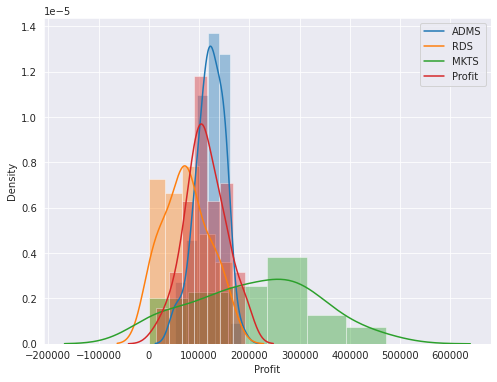

In [15]:
plt.figure(figsize = (8,6))
labels = ['ADMS', 'RDS', 'MKTS', 'Profit']
sns.distplot(data['ADMS'],hist = True)
sns.distplot(data['RDS'],hist = True)
sns.distplot(data['MKTS'],hist = True)
sns.distplot(data['Profit'],hist = True)
plt.legend(labels)

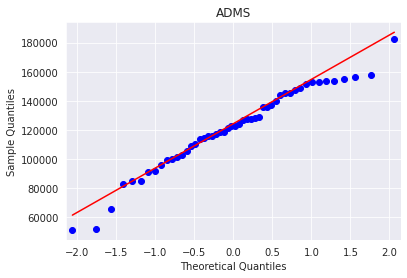

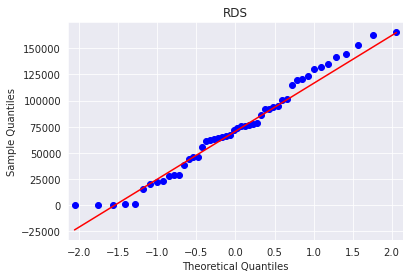

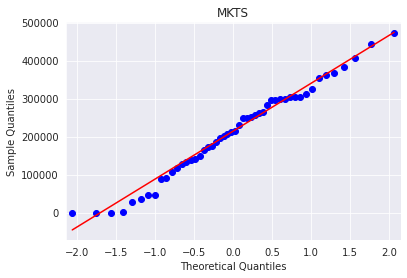

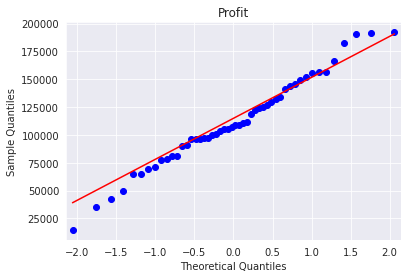

In [16]:
sm.qqplot(data["ADMS"], line = 'q')
plt.title('ADMS')
sm.qqplot(data["RDS"], line = 'q')
plt.title('RDS')
sm.qqplot(data["MKTS"], line = 'q')
plt.title('MKTS')
sm.qqplot(data["Profit"], line = 'q')
plt.title('Profit')
plt.show()

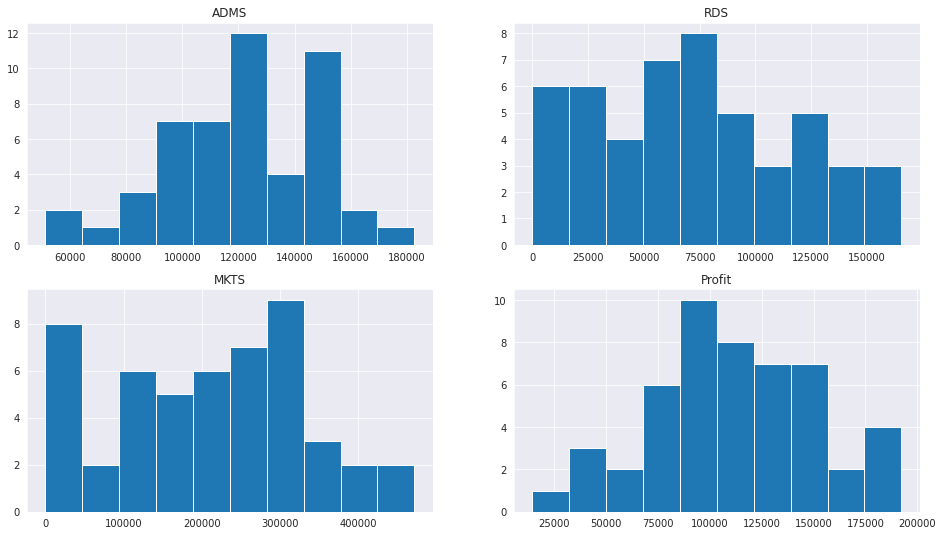

In [17]:
plt.subplots(figsize = (16,9))
plt.subplot(221)
plt.hist(data['ADMS'])
plt.title('ADMS')
plt.subplot(222)
plt.hist(data['RDS'])
plt.title('RDS')
plt.subplot(223)
plt.hist(data['MKTS'])
plt.title('MKTS')
plt.subplot(224)
plt.hist(data['Profit'])
plt.title('Profit')
plt.show()

# INDEPENDENT AND DEPENDENT VARIABLE

In [18]:
X = df.iloc[: , :-1].values
y = df.iloc[:, -1].values

In [19]:
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [20]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

# Encoding Categorical Data

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3] )], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [22]:
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [23]:
X = X[:, 1:]

In [24]:
X

array([[0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 1.0, 94657.16, 145077.58, 282574.31],
       [1.0, 0.0, 91749.16, 114175.79, 294919.57],
       [0.0, 1.0, 86419.7

# Splitting the Dataset

In [25]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2 , random_state=0)

# Fitting the MLR mode

In [26]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred = regression.predict(X_test)
y_pred

array([103015.20159796, 132582.27760816, 132447.73845175,  71976.09851259,
       178537.48221054, 116161.24230163,  67851.69209676,  98791.73374688,
       113969.43533012, 167921.0656955 ])

In [28]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

# MLR OPTIMAL MODEL

In [29]:
import statsmodels.api as sm
X = np.append(arr = np.ones((50,1)).astype(int),values=X,axis=1)
X

array([[1, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [1, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [1, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [1, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [1, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [1, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [1, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [1, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [1, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [1, 0.0, 1.0, 94657.16, 145077.58, 282574.31],
       [1, 1.0, 0.0, 9

In [30]:
X_opt = X[:, [0,1,2,3,4,5]]

In [31]:
X_opt = np.array(X_opt, dtype=float)

In [32]:
import statsmodels.api as sm
regression_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           1.34e-27
Time:                        16:07:33   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
X_opt = X[:, [0,1,3,4,5]]
X_opt = np.array(X_opt, dtype=float)
regression_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           8.49e-29
Time:                        16:07:33   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
X_opt = X[:, [0,3,4,5]]
X_opt = np.array(X_opt, dtype=float)
regression_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           4.53e-30
Time:                        16:07:33   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
X_opt = X[:, [0,3,5]]
X_opt = np.array(X_opt, dtype=float)
regression_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           2.16e-31
Time:                        16:07:33   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
X_opt = X[:, [0,3]]
X_opt = np.array(X_opt, dtype=float)
regression_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           3.50e-32
Time:                        16:07:33   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""